In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset

In [2]:
data=pd.read_csv(r'C:\Users\elsap\Rio_classification3.csv')
data

,Blood_group,Name,Sex,Drug,condition,SideEffects,Age,BP,Cholestrol,EaseofUse,Effectiveness,Satisfaction,Race
0,A+,Jennifer Hayes,F,lexapro,depression,Mild Side Effects,23.0,HIGH,HIGH,5.0,5.0,5.0,black
1,B-,George Schultz,M,lexapro,depression and generalized anxiety,Moderate Side Effects,47.0,LOW,HIGH,5.0,5.0,5.0,black
2,O-,Michael Roach,M,lexapro,major depression/anxiety,Mild Side Effects,47.0,LOW,HIGH,2.0,3.0,3.0,black
3,A-,Jennifer Bryant,F,lexapro,depression,Severe Side Effects,28.0,NORMAL,HIGH,2.0,2.0,1.0,black
4,A-,David Morris,M,lexapro,depression/anxiety,Moderate Side Effects,61.0,LOW,HIGH,1.0,1.0,1.0,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,B+,Sean Bennett,M,lexapro,depression,Mild Side Effects,47.0,HIGH,HIGH,5.0,4.0,1.0,black
399996,O+,Timothy Mckay,M,lexapro,depression,Mild Side Effects,36.0,LOW,HIGH,4.0,4.0,1.0,black
399997,A-,Cassandra Frank,F,lexapro,depression,No Side Effects,34.0,LOW,NORMAL,1.0,2.0,2.0,black
399998,AB+,Craig Cortez,M,lexapro,depression/anxiety,No Side Effects,26.0,LOW,HIGH,5.0,5.0,5.0,black


# Grouping

In [3]:
data['condition'].value_counts()

depression                            184079
anxiety                                31866
depression/anxiety                     25160
depression & anxiety                   18881
anxiety/depression                     12614
anxiety and depression                 12540
major depression/anxiety                6465
major depression                        6455
ocd                                     6441
anxiety, stress                         6440
anxiety depression                      6418
depression, anxiety                     6411
panic attacks and depression            6406
clinical depression                     6396
general depression/perimenopause        6392
stressfull live change                  6388
anxiety, depression                     6382
depression and generalized anxiety      6373
panic attacks                           6373
depression, ptsd                        6354
nerves                                  6350
peri-menopausal syptoms                 6313
anxiety, d

In [4]:
data['condition']=data['condition'].replace(['clinical depression','depression','major depression/anxiety','anxiety','anxiety/depression','major depression'],'anxiety/depression')
data['condition']=data['condition'].replace(['anxiety depression','anxiety, depresion','anxiety, depression','depression & anxiety','depression, anxiety','anxiety and depression','depression and generalized anxiety'],'depression and anxiety')
data['condition']=data['condition'].replace(['anxiety, stress'],'stress')
data['condition']=data['condition'].replace(['depression, ptsd'],'ptsd')
data['condition']=data['condition'].replace(['general depression/perimenopause','peri-menopausal syptoms'],'perimenopause')
data['condition']=data['condition'].replace(['panic attacks and depression'],'panic attacks')

# Basic details

In [5]:
data.head()

,Blood_group,Name,Sex,Drug,condition,SideEffects,Age,BP,Cholestrol,EaseofUse,Effectiveness,Satisfaction,Race
0,A+,Jennifer Hayes,F,lexapro,anxiety/depression,Mild Side Effects,23.0,HIGH,HIGH,5.0,5.0,5.0,black
1,B-,George Schultz,M,lexapro,depression and anxiety,Moderate Side Effects,47.0,LOW,HIGH,5.0,5.0,5.0,black
2,O-,Michael Roach,M,lexapro,anxiety/depression,Mild Side Effects,47.0,LOW,HIGH,2.0,3.0,3.0,black
3,A-,Jennifer Bryant,F,lexapro,anxiety/depression,Severe Side Effects,28.0,NORMAL,HIGH,2.0,2.0,1.0,black
4,A-,David Morris,M,lexapro,depression/anxiety,Moderate Side Effects,61.0,LOW,HIGH,1.0,1.0,1.0,black


In [6]:
data.shape

(400000, 13)

In [7]:
data.isnull().sum()

Blood_group      0
Name             0
Sex              0
Drug             0
condition        0
SideEffects      0
Age              0
BP               0
Cholestrol       0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Race             0
dtype: int64

In [8]:
data.dtypes

Blood_group       object
Name              object
Sex               object
Drug              object
condition         object
SideEffects       object
Age              float64
BP                object
Cholestrol        object
EaseofUse        float64
Effectiveness    float64
Satisfaction     float64
Race              object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
Blood_group      400000 non-null object
Name             400000 non-null object
Sex              400000 non-null object
Drug             400000 non-null object
condition        400000 non-null object
SideEffects      400000 non-null object
Age              400000 non-null float64
BP               400000 non-null object
Cholestrol       400000 non-null object
EaseofUse        400000 non-null float64
Effectiveness    400000 non-null float64
Satisfaction     400000 non-null float64
Race             400000 non-null object
dtypes: float64(4), object(9)
memory usage: 39.7+ MB


In [10]:
data.columns

Index(['Blood_group', 'Name', 'Sex', 'Drug', 'condition', 'SideEffects', 'Age',
       'BP', 'Cholestrol', 'EaseofUse', 'Effectiveness', 'Satisfaction',
       'Race'],
      dtype='object')

In [11]:
data.describe()

,Age,EaseofUse,Effectiveness,Satisfaction
count,400000.00000,400000.000000,400000.000000,400000.000000
mean,44.29504,4.019910,3.532113,3.134640
std,16.49036,1.317738,1.456121,1.611288
min,15.00000,1.000000,1.000000,1.000000
25%,31.00000,3.000000,3.000000,1.000000
50%,45.00000,5.000000,4.000000,3.000000
75%,58.00000,5.000000,5.000000,5.000000
max,74.00000,10.000000,10.000000,10.000000


# Analysis

In [12]:
pd.crosstab(index=data['Sex'],columns='count')

col_0,count
Sex,
F,200773
M,199227


In [13]:
pd.crosstab(index=data[ 'Effectiveness'],columns='count')

col_0,count
Effectiveness,
1.0,65513
2.0,33940
3.0,66502
4.0,90287
5.0,143754
6.0,3
10.0,1


In [14]:
pd.crosstab(index=data['condition'],columns='count')

col_0,count
condition,
anxiety/depression,247875
depression and anxiety,63261
"depression, lack of motivation",6247
depression/anxiety,25160
nerves,6350
ocd,6441
panic attacks,12779
perimenopause,12705
ptsd,6354


In [15]:
pd.crosstab(index=data['SideEffects'],columns='count')

col_0,count
SideEffects,
Extremely Severe Side Effects,32034
Mild Side Effects,164907
Moderate Side Effects,76213
No Side Effects,88775
Severe Side Effects,38071


In [16]:
pd.crosstab(index=data['BP'],columns='count')

col_0,count
BP,
HIGH,153817
LOW,127701
NORMAL,118482


In [17]:
pd.crosstab(index=data['Cholestrol'],columns='count')

col_0,count
Cholestrol,
HIGH,205972
NORMAL,194028


In [18]:
pd.crosstab(index=data['Race'],columns='count')

col_0,count
Race,
black,389310
white,10690


# Correlation

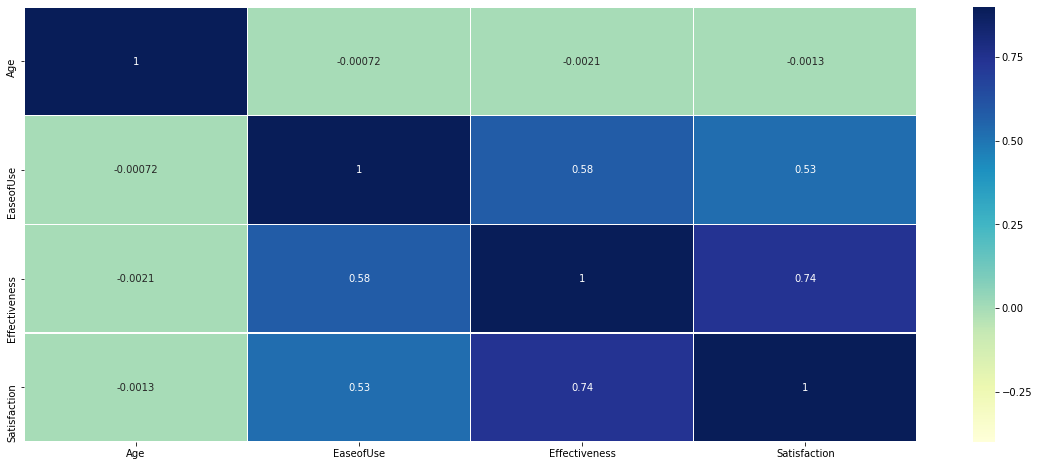

In [19]:
corr_matrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_matrix,vmin=-.4,vmax=.9,annot=True,linewidths=.2,cmap='YlGnBu')   

# Distribution

Text(0, 0.5, 'count')

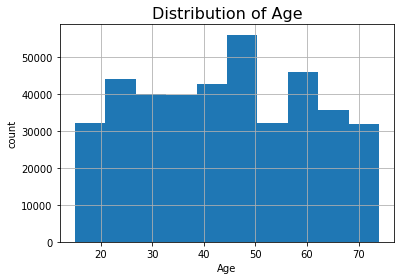

In [20]:
data['Age'].hist()
plt.title('Distribution of Age',fontsize=16)
plt.xlabel('Age')
plt.ylabel('count')                                

Text(0, 0.5, 'count')

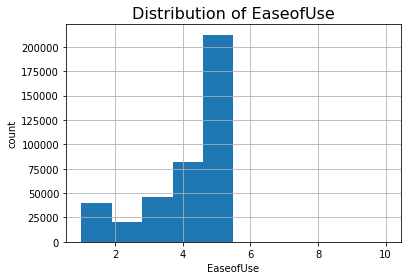

In [21]:
data['EaseofUse'].hist()
plt.title('Distribution of EaseofUse',fontsize=16)
plt.xlabel('EaseofUse')
plt.ylabel('count')

Text(0, 0.5, 'count')

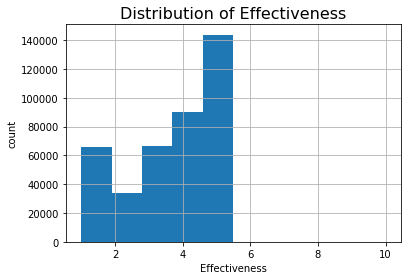

In [22]:
data['Effectiveness'].hist()
plt.title('Distribution of Effectiveness',fontsize=16)
plt.xlabel('Effectiveness')
plt.ylabel('count')

Text(0, 0.5, 'count')

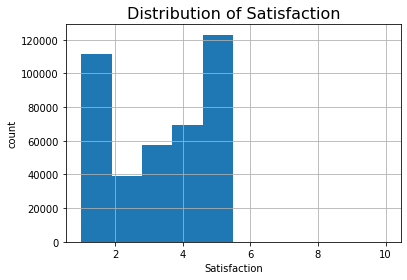

In [23]:
data['Satisfaction'].hist()
plt.title('Distribution of Satisfaction',fontsize=16)
plt.xlabel('Satisfaction')
plt.ylabel('count')

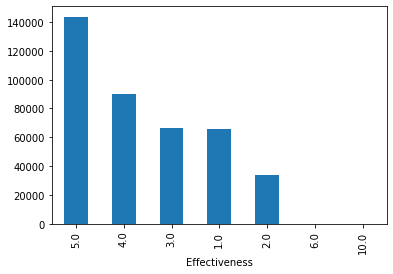

In [24]:
data['Effectiveness'].value_counts().plot(kind='bar')
plt.xlabel('Effectiveness')
plt.show()

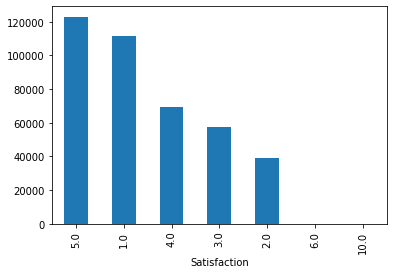

In [25]:
data['Satisfaction'].value_counts().plot(kind='bar')
plt.xlabel('Satisfaction')
plt.show()

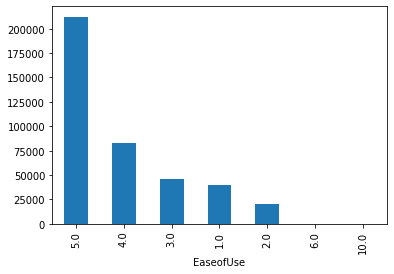

In [26]:
data['EaseofUse'].value_counts().plot(kind='bar')
plt.xlabel('EaseofUse')
plt.show()

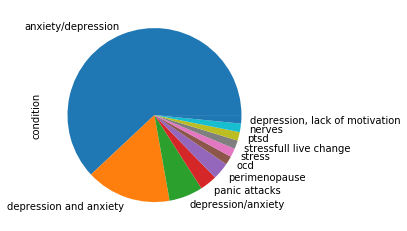

In [27]:
data['condition'].value_counts().plot(kind='pie')
plt.show()

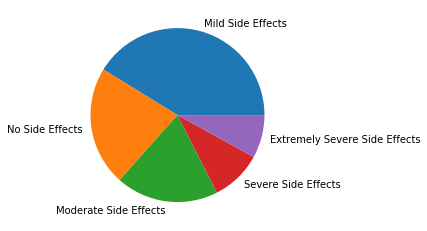

In [28]:
data['SideEffects'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

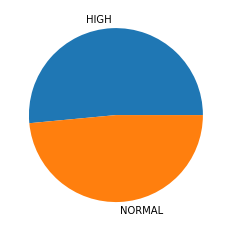

In [29]:
data['Cholestrol'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

# Boxplot

Text(0.5, 1.0, 'box plot of Age')

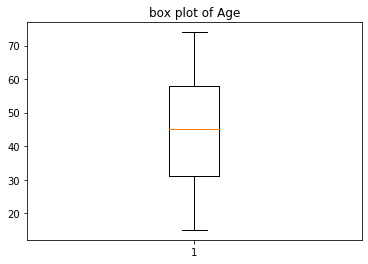

In [30]:
plt.boxplot(data['Age'])
plt.title('box plot of Age')

Text(0.5, 1.0, 'box plot of EaseofUse')

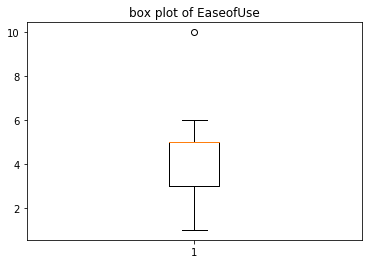

In [31]:
plt.boxplot(data['EaseofUse'])
plt.title('box plot of EaseofUse')

In [32]:
Q1=np.percentile(data['EaseofUse'],25,interpolation='midpoint')
Q2=np.percentile(data['EaseofUse'],50,interpolation='midpoint')
Q3=np.percentile(data['EaseofUse'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [33]:
print(Q1)
print(Q2)
print(Q3)
print(IQR)
print(low_lim)
print(Up_lim)

3.0
5.0
5.0
2.0
0.0
8.0


Text(0.5, 1.0, 'box plot of Effectiveness')

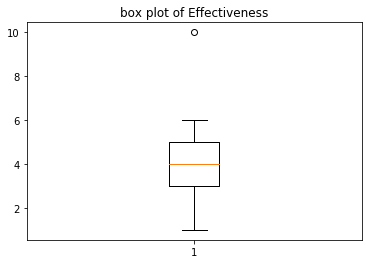

In [34]:
plt.boxplot(data['Effectiveness'])
plt.title('box plot of Effectiveness')

Text(0.5, 1.0, 'box plot of Satisfaction')

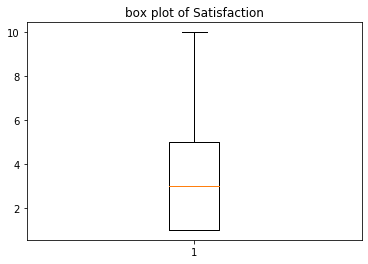

In [35]:
plt.boxplot(data['Satisfaction'])
plt.title('box plot of Satisfaction')

# Univariate analysis

[Text(0, 0, 'Mild Side Effects'),
 Text(0, 0, 'Moderate Side Effects'),
 Text(0, 0, 'Severe Side Effects'),
 Text(0, 0, 'No Side Effects'),
 Text(0, 0, 'Extremely Severe Side Effects')]

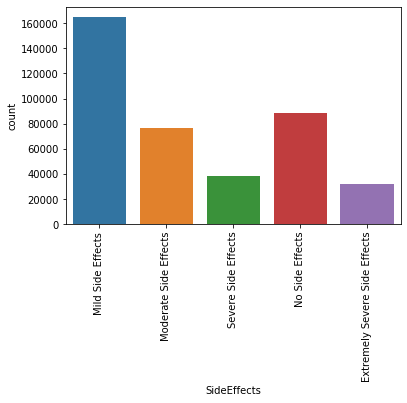

In [36]:
chart=sns.countplot(data['SideEffects'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'A+'),
 Text(0, 0, 'B-'),
 Text(0, 0, 'O-'),
 Text(0, 0, 'A-'),
 Text(0, 0, 'B+'),
 Text(0, 0, 'O+'),
 Text(0, 0, 'AB+'),
 Text(0, 0, 'AB-')]

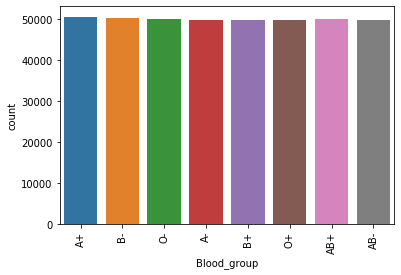

In [37]:
chart1=sns.countplot(data['Blood_group'])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

[Text(0, 0, 'anxiety/depression'),
 Text(0, 0, 'depression and anxiety'),
 Text(0, 0, 'depression/anxiety'),
 Text(0, 0, 'depression, lack of motivation'),
 Text(0, 0, 'perimenopause'),
 Text(0, 0, 'panic attacks'),
 Text(0, 0, 'ocd'),
 Text(0, 0, 'ptsd'),
 Text(0, 0, 'stressfull live change'),
 Text(0, 0, 'stress'),
 Text(0, 0, 'nerves')]

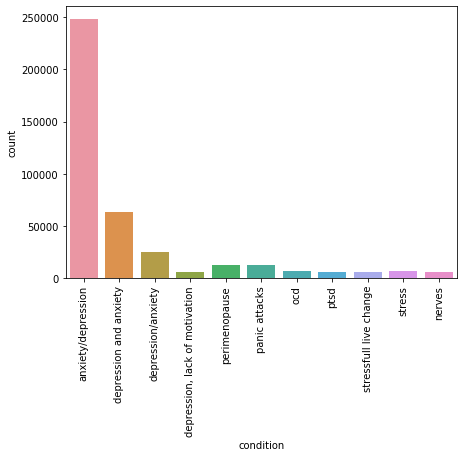

In [38]:
plt.figure(figsize=(7,5))
chart2=sns.countplot(data['condition'])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

[Text(0, 0, 'HIGH'), Text(0, 0, 'LOW'), Text(0, 0, 'NORMAL')]

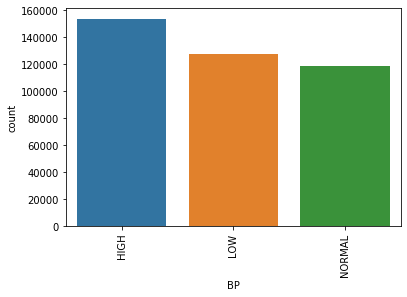

In [39]:
chart2=sns.countplot(data['BP'])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

[Text(0, 0, 'HIGH'), Text(0, 0, 'NORMAL')]

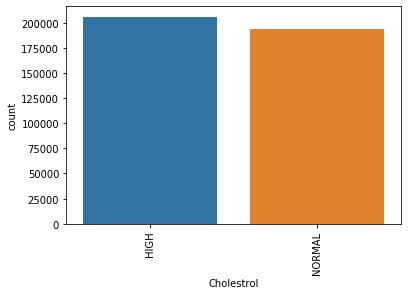

In [40]:
chart3=sns.countplot(data['Cholestrol'])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)

# Independent variable categorical

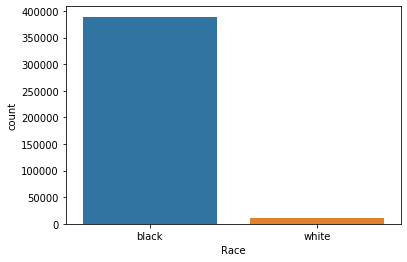

In [41]:
sns.countplot(data['Race'])

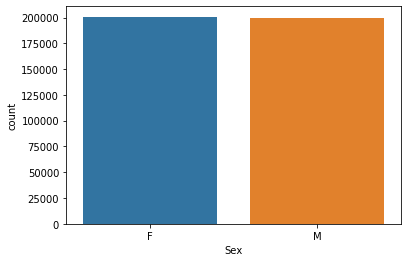

In [42]:
sns.countplot(data['Sex'])

In [43]:
age_groups = []
for i in data['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')

data['AgeGroup'] = age_groups

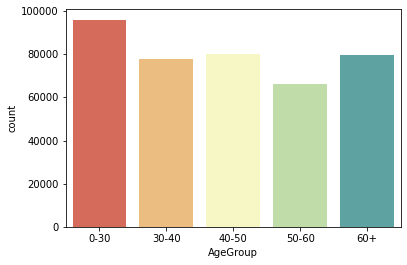

In [44]:
sns.countplot(x="AgeGroup", data=data, palette='Spectral', order=['0-30', '30-40', '40-50', '50-60', '60+'])

# Independent variable Numerical

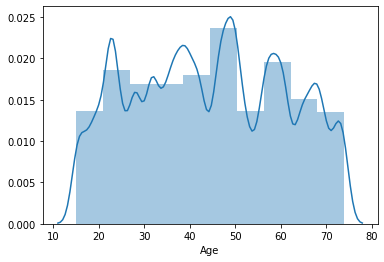

In [45]:
sns.distplot(data['Age'],bins=10)

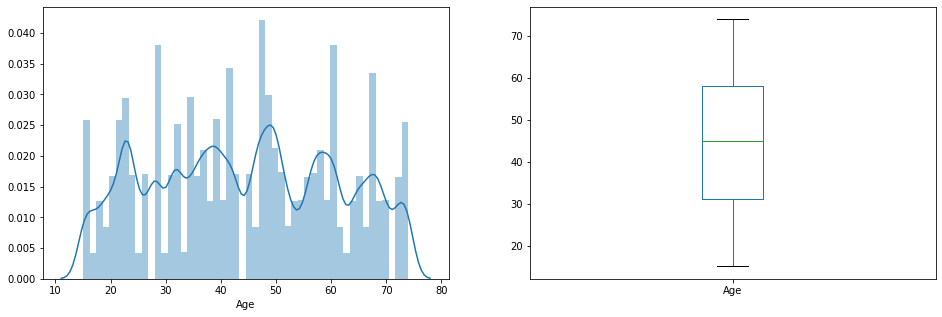

In [46]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Age']);
plt.subplot(122)
data['Age'].plot.box(figsize=(16,5))
plt.show()

[Text(0, 0, 'Extremely Severe Side Effects'),
 Text(0, 0, 'Mild Side Effects'),
 Text(0, 0, 'Moderate Side Effects'),
 Text(0, 0, 'No Side Effects'),
 Text(0, 0, 'Severe Side Effects')]

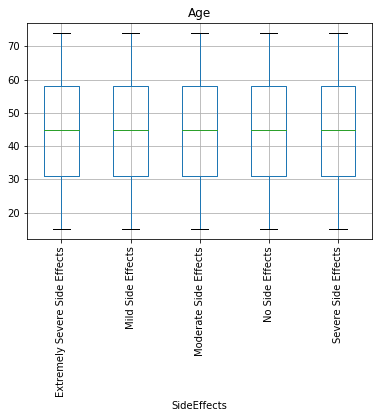

In [47]:
gra=data.boxplot(column='Age', by ='SideEffects')
plt.suptitle("")
gra.set_xticklabels(gra.get_xticklabels(), rotation=90)

# Bivariate analysis

# categorical independent variable VS Target

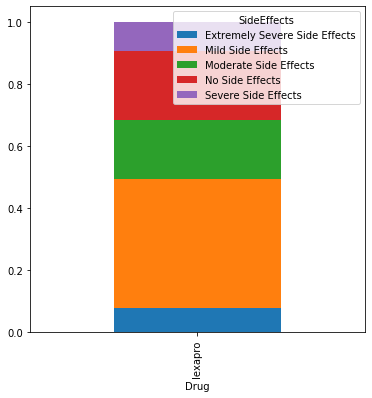

In [48]:
Drug=pd.crosstab(data['Drug'],data['SideEffects'])
Drug.div(Drug.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

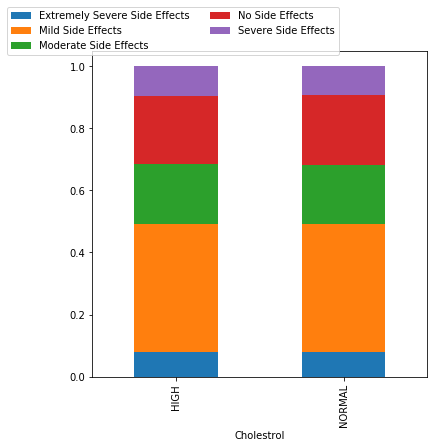

In [49]:
cho=pd.crosstab(data['Cholestrol'],data['SideEffects'])
cho.div(cho.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2) 

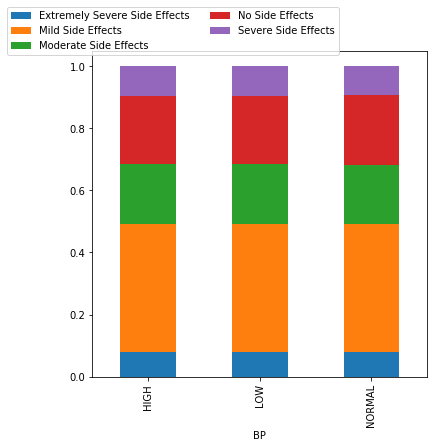

In [50]:
BP=pd.crosstab(data['BP'],data['SideEffects'])
BP.div(BP.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2) 

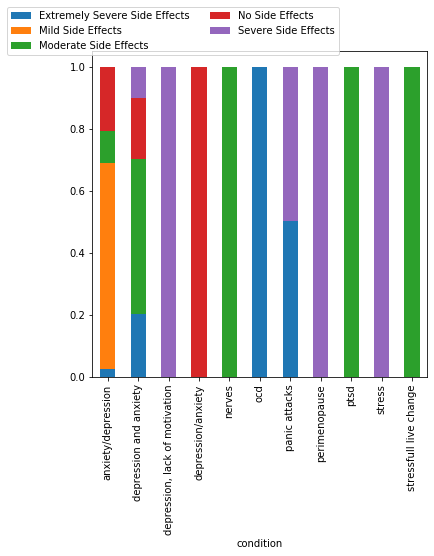

In [51]:
con=pd.crosstab(data['condition'],data['SideEffects'])
con.div(con.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2) 

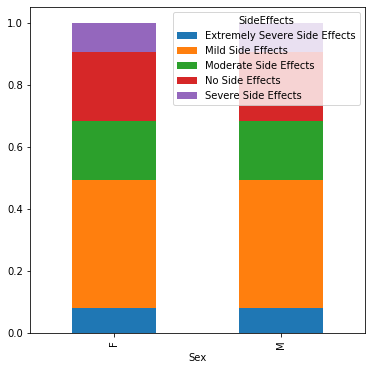

In [52]:
Sex=pd.crosstab(data['Sex'],data['SideEffects'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

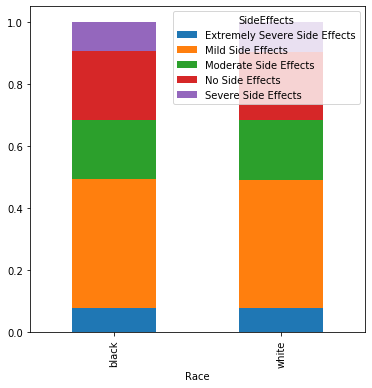

In [53]:
Race=pd.crosstab(data['Race'],data['SideEffects'])
Race.div(Race.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

In [54]:
data.columns

Index(['Blood_group', 'Name', 'Sex', 'Drug', 'condition', 'SideEffects', 'Age',
       'BP', 'Cholestrol', 'EaseofUse', 'Effectiveness', 'Satisfaction',
       'Race', 'AgeGroup'],
      dtype='object')

# Dropping

In [55]:
data=data.drop(['Name','Blood_group','Drug','AgeGroup'],axis=1)

# One hot Encoding

In [56]:
sex=pd.get_dummies(data['Sex'])
race=pd.get_dummies(data['Race'])


In [57]:
data=pd.concat([data,sex],axis=1)
data=data.drop(['Sex'],axis=1)
data=pd.concat([data,race],axis=1)
data=data.drop(['Race'],axis=1)


# Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['BP','Cholestrol','condition']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

# Splitting of dataset

In [59]:
y=data['SideEffects']
x=data.drop(['SideEffects'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

# KNN

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [62]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

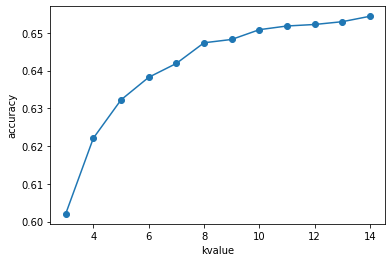

In [63]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [64]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [65]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.65
precision is  0.66
recall score is 0.65
f1 score is 0.62


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [67]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.70
precision is  0.76
recall score is 0.70
f1 score is 0.66


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\elsap\Downloads\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
confusion_matrix(y_test,y_pred)

array([[ 3273,  1855,  2985,   384,  1068],
       [   65, 47916,   385,  1316,     0],
       [  880,  7364, 13257,  1169,   310],
       [  319, 14791,  3028,  8159,   119],
       [ 1168,     1,  1515,   198,  8475]], dtype=int64)

In [70]:
from sklearn import metrics
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6756666666666666


In [71]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

condition        78.360963
Age              10.480733
Satisfaction      3.306408
EaseofUse         3.191170
Effectiveness     3.095390
BP                0.657239
Cholestrol        0.273677
M                 0.213769
F                 0.196324
white             0.118778
black             0.105549
dtype: float64

# Extreme Gradient Boosting

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

C:\Users\elsap\Downloads\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
from sklearn import metrics
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6984166666666667


# Standard Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

# KNN after standard scaling

In [75]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

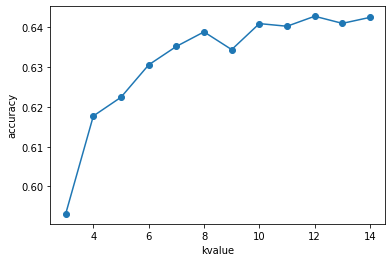

In [76]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [77]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [78]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.64
precision is  0.65
recall score is 0.64
f1 score is 0.61


# Decision Tree after standard scaling

In [79]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [81]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.70
precision is  0.76
recall score is 0.70
f1 score is 0.66


# Random Forest after standard scaling

In [82]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\elsap\Downloads\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [84]:
confusion_matrix(y_test,y_pred)

array([[ 3276,  1852,  2974,   388,  1075],
       [   58, 47935,   355,  1334,     0],
       [  901,  7365, 13354,  1046,   314],
       [  347, 14786,  3026,  8127,   130],
       [ 1142,     1,  1485,   171,  8558]], dtype=int64)

In [85]:
from sklearn import metrics
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6770833333333334


# Extreme gradient boosting after standard scaling

In [86]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

In [87]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

C:\Users\elsap\Downloads\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
from sklearn import metrics
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6984166666666667
